# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [1]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [2]:
# Import du dataframe "data.csv"
df = pd.read_csv("data.csv", decimal=",")  # The argument decimal=","  replaces points by commas.

In [3]:
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [4]:
df.describe() # Basic stastical summary

,Experience
count,9488.000000
mean,2.814186
std,2.716293
min,0.000000
25%,1.000000
50%,2.000000
75%,3.500000
max,21.000000


### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

In [5]:
'There are {} observations.'.format(df.shape[0]) # Size of the data frame

'There are 9582 observations.'

The following command line shows the total number of missing values per variable:

In [6]:
df.isna().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

In [7]:
print(f'The number of missing values is equal to {df.isna().sum().sum()}.')

The number of missing values is equal to 130.


### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [8]:
ExpDS = df['Experience'][df['Metier'] == 'Data scientist']
MedExpDS = ExpDS.median(axis=0, skipna=True)
'The meadian experience for data scientists is equal to {}'.format(MedExpDS)

'The meadian experience for data scientists is equal to 2.0'

In [9]:
ExpDE = df['Experience'][df['Metier'] == 'Data engineer']
MeanExpDE = ExpDE.mean(axis=0, skipna=True)
'The meadian experience for data scientists is equal to {}'.format(MeanExpDE)

'The meadian experience for data scientists is equal to 2.984959174903309'

Using these two values we could impute the missing values such as:

In [10]:
"There are {} 'experience' missing values for data scientists.".format(df["Experience"][df["Metier"] == 'Data scientist'].isna().sum())

"There are 32 'experience' missing values for data scientists."

In [11]:
"There are {} 'experience' missing values for data engineers.".format(df["Experience"][df["Metier"] == 'Data engineer'].isna().sum())

"There are 20 'experience' missing values for data engineers."

In [12]:
IndexMissingValuesDE  = list(df[df['Metier'] == 'Data engineer'].loc[df['Experience'].isnull(),'Experience'].index)

In [13]:
df.iloc[IndexMissingValuesDE, 4] =  MeanExpDE

In [14]:
IndexMissingValuesDS  = list(df[df['Metier'] == 'Data scientist'].loc[df['Experience'].isnull(),'Experience'].index)

In [15]:
df.iloc[IndexMissingValuesDS, 4] =  MedExpDS

In [16]:
df.describe()

,Experience
count,9540.000000
mean,2.811813
std,2.709299
min,0.000000
25%,1.000000
50%,2.000000
75%,3.500000
max,21.000000


### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [17]:
print(round(df.groupby('Metier').mean(),3))

                     Experience
Metier                         
Data architecte           3.000
Data engineer             2.985
Data scientist            2.241
Lead data scientist       3.965


### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

Text(0.5, 1.0, "Représentation du nombre d'année d'expérience par métier")

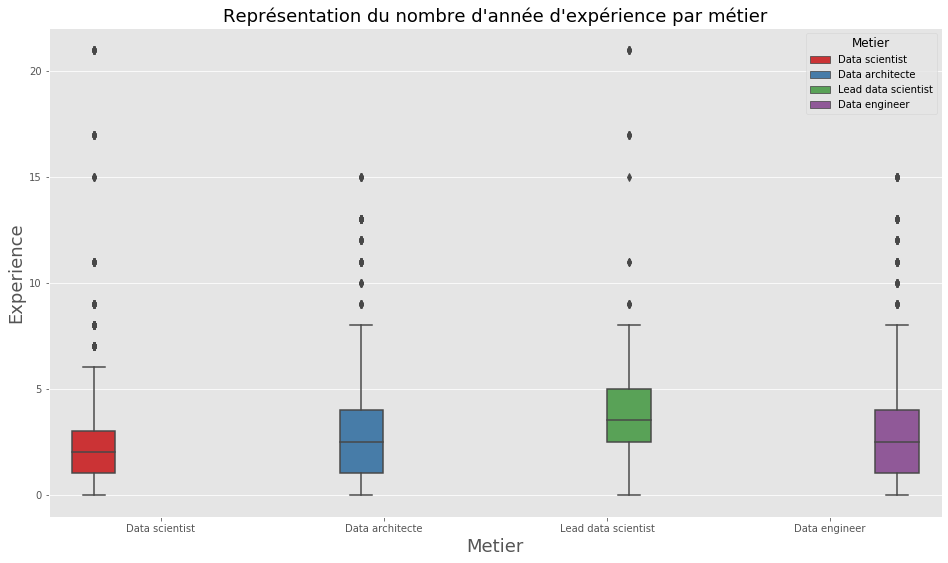

In [18]:
plt.figure(figsize=(16, 9))
b =  sb.boxplot(x="Metier", y="Experience",
            hue="Metier", data=df, palette="Set1")

b.axes.set_xlabel("Metier",fontsize=18)
b.axes.set_ylabel("Experience",fontsize=18)
b.axes.set_title("Représentation du nombre d'année d'expérience par métier",fontsize=18)

### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

**Step 1: Imputation of `Experience` missing values**

Sum of the raaining missing values

In [19]:
df['Experience'].isna().sum()

42

The experiences' missing velues associated to data architect and lead data scientist are going to be impute by the mean value of this category.

In [20]:
ExpDA = df['Experience'][df['Metier'] == 'Data architecte']
MeanExpDA = ExpDA.mean(axis=0, skipna=True)
'The meadian experience for data scientists is equal to {}'.format(MeanExpDE)
"There are {} 'experience' missing values for data architecte.".format(df["Experience"][df["Metier"] == 'Data architecte'].isna().sum())

"There are 23 'experience' missing values for data architecte."

In [21]:
IndexMissingValuesDA  = list(df[df['Metier'] == 'Data architecte'].loc[df['Experience'].isnull(),'Experience'].index)
df.iloc[IndexMissingValuesDA, 4] =  MeanExpDA

In [22]:
ExpLDS = df['Experience'][df['Metier'] == 'Lead data scientist']
MeanExpLDS = ExpLDS.mean(axis=0, skipna=True)
'The meadian experience for data scientists is equal to {}'.format(MeanExpLDS)
"There are {} 'experience' missing values for data architecte.".format(df["Experience"][df["Metier"] == 'Lead data scientist'].isna().sum())

"There are 19 'experience' missing values for data architecte."

In [23]:
IndexMissingValuesLDS  = list(df[df['Metier'] == 'Lead data scientist'].loc[df['Experience'].isnull(),'Experience'].index)
df.iloc[IndexMissingValuesLDS , 4] =  MeanExpLDS

**Step 2: Imputation of `Metier` missing values**

Substitute missing values in the column `Metier` by "Unknown":

In [24]:
df['Metier'].isna().sum()

19

In [25]:
df['Metier'] = df['Metier'].fillna('Unknown')

**Step 3: Filling of `Exp_label` column**

Brouillon pour Aury:
* Nous calculons les 3 premiers quantiles (.25, .5 et .75)par métier,
* Et nous associons les catégories selon la règle suivante:
   * If Exp < quantile(0.25) => Exp_label = Débutant
   * Elif  Exp in [quantile(0.25), quantile(0.5)) = Confirmé
   
   * Elif Exp in [quantile(0.5), quantile(0.75)) = Avancé
   
   * Else Exp >= quantile(0.75) = Expert

Creation of an empty column named 'Exp_label':

In [26]:
df['Exp_label'] = np.nan

In [27]:
MetierL= list(set(df['Metier']))
quantile_label = {0.25:'debutant', 0.5:'confirme', 0.75:'avance', 0.76:'expert'}
for i in MetierL:
    for ql in quantile_label:
        if ql <= 0.75:
            ind = list(df[(df['Metier'] == i) & (df['Exp_label'].isna())].loc[df['Experience'] < df['Experience'].quantile(q=ql),'Experience'].index)
            df.iloc[ind , 6] = quantile_label[ql]
        else: # Expert class
            ind = list(df[(df['Metier'] == i) & (df['Exp_label'].isna())].index)
            df.iloc[ind , 6] = quantile_label[ql]

**Step 4: Représentation graphique**

Text(0.5, 1.0, "Répartion des niveaux d'expériece par métier")

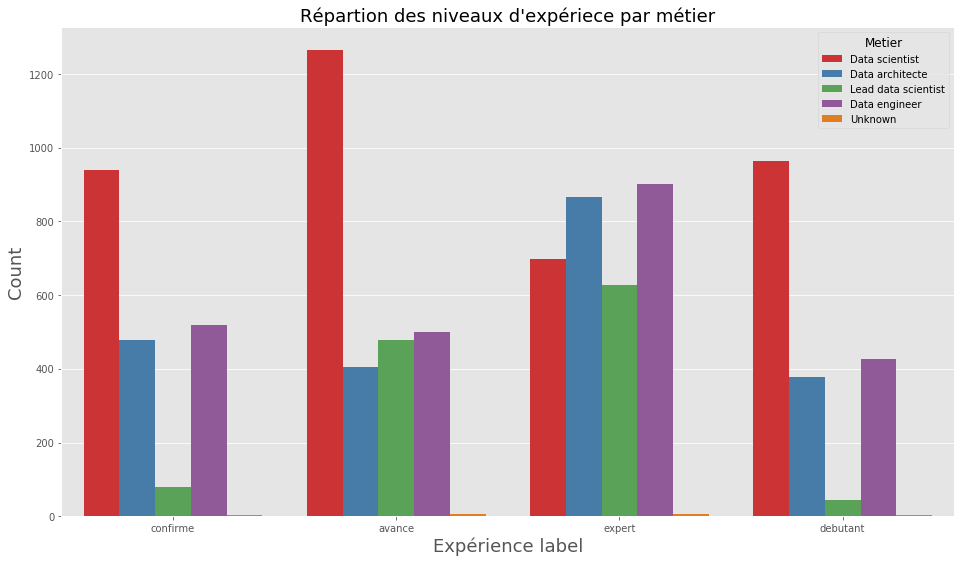

In [28]:
plt.figure(figsize=(16, 9))
b =  sb.countplot( x="Exp_label", hue="Metier", data=df, palette="Set1")

b.axes.set_xlabel("Expérience label",fontsize=18)
b.axes.set_ylabel("Count",fontsize=18)
b.axes.set_title("Répartion des niveaux d'expériece par métier",fontsize=18)

### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

In [29]:
df['Metier'] =  df['Metier'].replace('Unknown', np.nan)

In [30]:
df['Metier'].isna().sum()

19

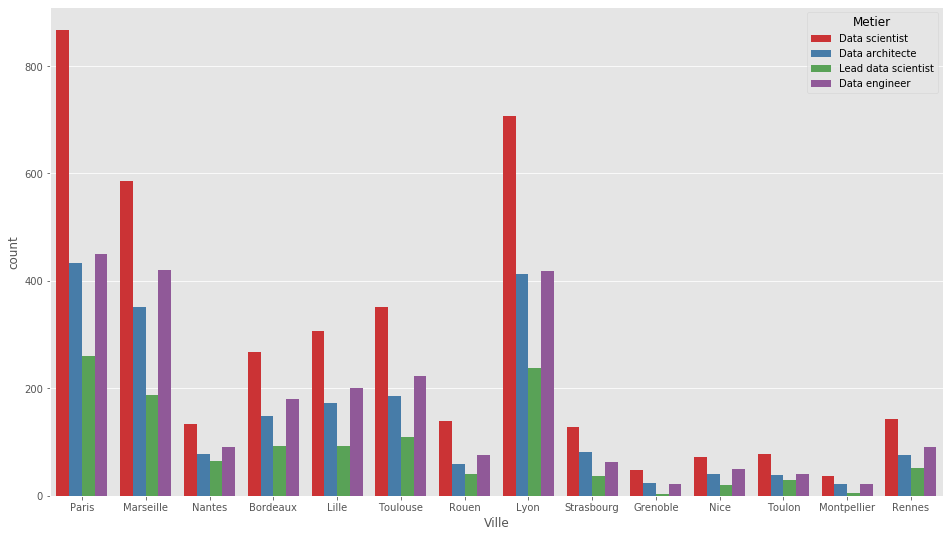

In [31]:
plt.figure(figsize=(16, 9))
b =  sb.countplot( x="Ville", hue= "Metier", data=df, palette="Set1")

In [32]:
len(set(df['Entreprise']))

1383

In [33]:
Lent= list(df['Entreprise'])
pd.Series(Lent).value_counts()

Ball Aerospace                     748
KPMG                               132
Amazon.com                         127
Brigham & Women's Hospital(BWH)    115
Google                             112
                                  ... 
Kessler Foundation                   1
Sartorius Corporation                1
TBWA\WorldHealth                     1
Milacron LLC                         1
BNP Paribas                          1
Length: 1382, dtype: int64

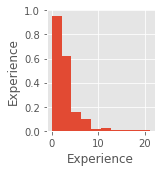

In [34]:
df2 = df
df2['Entreprise'] = df.Entreprise.astype('category')
df2['Metier'] = df.Metier.astype('category')
df2['Technologies'] = df.Technologies.astype('category')
df2['Ville'] = df.Ville.astype('category')




df2.dtypes
sb.pairplot(df2)

Brouillon Aury:
* On éimine une régression logistique car on ne peut pas déterminer sur des variables uniquement catégorielles si les données sont linéairement séparables "Too many categorical variables are also a problem for logistic regression. "

* Decision Trees Pros:
    * Intuitive Decision Rules
       * Can handle non-linear features
        * Take into account variable interactions
    * Decision Trees Cons:
        * Highly biased to training set [Random Forests to your rescue]
        * No ranking score as direct result

**Step 1: Data preprocessing**

Replace categorial data by one hot encoding for the variable `entrepresie`, and eliminate each `compay` which has less than 30 employees. We can consider that these ones are not informative.

In [45]:
s = pd.Series(list(df['Entreprise']))
one_hot_encoding_entreprise = pd.get_dummies(s)
one_hot_encoding_entreprise.shape
indexL = []
one_hot_encoding_entreprise.sum(axis=1)
for i in range(one_hot_encoding_entreprise.shape[1]):
    if one_hot_encoding_entreprise.iloc[:,i].sum() < 30:
        indexL.append(i)
one_hot_encoding_entreprise = one_hot_encoding_entreprise.drop(one_hot_encoding_entreprise.columns[indexL], axis=1)

For technology:

Brouillon Aury : J'ai décidé de pas enlevé de techno ar tt sont cnnnues par beaucoup

In [120]:
Ltechno = []
techno = df['Technologies']
for i in range(len(techno)):
    v = re.split('/', techno[i], flags=re.IGNORECASE)
    for i in range(len(v)):
        Ltechno.append(v[i])
set_Techno = list(set(Ltechno))
set_Techno = set_Techno[1:len(set_Techno)] # Remove the empty techno

MTechno = np.zeros((df.shape[0], len(set_Techno)))
dfTechno = pd.DataFrame(MTechno)


Brouillon Aury :
    Attention la cellule du dessous est super longue !!!!! 

In [135]:
for i in range(len(set_Techno)):
    for j in range(df.shape[0]):
        if df['Technologies'][j].find(set_Techno[i]) != -1:
            dfTechno.iloc[j,i] = 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [136]:
dfTechno

,GNU,Spark,Windows,AWS,C++,R,ORACLE,NoSQ,MySQL,Excel,...,PostgreSQL,scikit-learn,Kafka,HBASE,machine learning,PIG,Docker,Java,Pycharm,Hadoop(HDFS)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9578,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9579,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [112]:
df_techno.index.values

array(['Python', 'R', 'SQL', 'Java', 'Hadoop', 'Excel', 'C++', 'Spark',
       'Linux', 'MongoDB', 'VBA', 'machine learning', 'SAS', 'Docker',
       'Matlab', 'Hive', 'Tensorflow', 'Elasticsearch', 'Big data', 'C',
       'Kibana', 'AWS', 'GNU', 'Teradata', '', 'scikit-learn',
       'Machine learning', 'Anglais', 'Pyspark', 'HDFS', 'SPSS',
       'Microsoft Azure', 'MariaDB', 'Scikit-learn', 'Scala', 'Cassandra',
       'Matplotlib', 'Vertica', 'Tableau', 'AI', 'Scoring', 'Pycharm',
       'Kafka', 'NoSQL', 'Deep learning', 'PostgreSQL', 'Yarn', 'PIG',
       'Map-Reduce', 'HBASE', 'anglais', 'PySpark', 'numpy', 'Redshift',
       'NoSQ', 'Hadoop(HDFS)', 'ORACLE', 'MySQL', 'Windows', 'Perl',
       'Ruby'], dtype=object)

In [69]:
print(one_hot_encoding_techno.shape)

(43712, 61)


**Step2: Training and test set:**
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [ ]:
df[df['Metier'].notna()].shape

In [ ]:
dfKnownMetier = df[df['Metier'].notna()]
X = 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

### 10) Décrire de façon détaillée les différentes étapes pour mener à bien un projet data complexe.

Dans le cadre d’une campagne de recrutement vous avez reçu un ensemble de cv qui ne sont pas à jour (le poste actuel n’est pas présent). Deux exemple de CV vous sont donnés en pièce jointe (il n'y a pas de mise en page type). Tous les CV sont au format PDF.

On souhaite connaitre le poste actuel de chaque candidat.

-  Quelles sont les différentes étapes nécessaires à la réalisation d'un tel projet?
-  Pour chaque étape, détaillez les taches à accomplir, les méthodes à suivre, les pistes possibles, les points critiques.
-  Justifiez consciencieusement vos choix
